# Data Preparation

In [1]:
import pandas as pd
import numpy as np
import sys

sys.path.append("/home/jovyan/work")

train_data = pd.read_csv('../data/raw/train.csv')
test_data = pd.read_csv('../data/raw/test.csv')
print(train_data.shape)
print(test_data.shape)

(8000, 22)
(3799, 21)


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

train_data_x = train_data.copy()
train_data_x = train_data_x.drop(['Id_old', 'Id'], axis=1)
train_data_target = train_data_x.pop('TARGET_5Yrs')

test_data_x = test_data.drop(['Id_old', 'Id'], axis=1)

scaler = MinMaxScaler()
df_train_scaled = pd.DataFrame(scaler.fit_transform(train_data_x), columns=train_data_x.columns)

X_data, X_test, y_data, y_test = train_test_split(df_train_scaled, train_data_target, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

print(train_data.shape)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(8000, 22)
(5120, 19)
(1280, 19)
(1600, 19)


## Experiment 1: Naive Bayes 

In [18]:
from sklearn.naive_bayes import GaussianNB, GaussianNB
from sklearn.calibration import CalibratedClassifierCV

clf = GaussianNB()
# clf = MultinomialNB()
calibrated_clf = CalibratedClassifierCV(base_estimator=clf, cv=10).fit(X_train, y_train)

In [19]:
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, balanced_accuracy_score

thr=0.8
pred = calibrated_clf.predict_proba(X_val)[:,1]
predx = [x for x in pred > thr]
print(f'{np.sum(predx)} out of {len(predx)} or {int(round(np.sum(predx)/len(predx)*100,0))}% of players are predicted to be 5+ Yrs')
print(f'ROC_AUC Score: {round(roc_auc_score(y_val, pred),3)}')

print(confusion_matrix(y_val, predx))
print(recall_score(y_val, predx))
print(accuracy_score(y_val, predx))
print(balanced_accuracy_score(y_val, predx))
print(f1_score(y_val, predx))

764 out of 1280 or 60% of players are predicted to be 5+ Yrs
ROC_AUC Score: 0.681
[[128  75]
 [388 689]]
0.6397400185701021
0.63828125
0.6351409452456422
0.7485062466051058


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.681


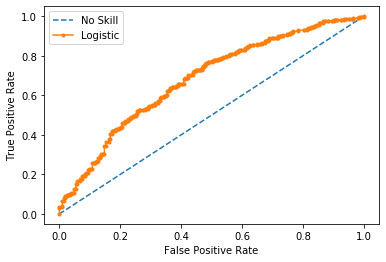

In [17]:
from src.visualization.visualize import plot_roc_curve
plot_roc_curve(pred, y_val)